In [1]:
import os
import sys
import pandas as pd
import numpy as np
import glob
import time
import gget
import scipy
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from importlib import reload

import sys
sys.path.append('../../Hypergraph-MT/code/HyMT')
sys.path.append('../../Hypergraph-MT/code/')
import HyMT as hymt

# Load the core

In [2]:
start_time = time.time()

# load the hypergraph:
fpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/transcription_clusters/core_incidence_1000000_protien_coding_only.pkl"
H = pd.read_pickle(fpath)
print(f"{H.shape=}")

end_time = time.time()
total_time = end_time - start_time

print(f"{H.shape=}")
print(f"Hypergraph loaded in: {total_time:.2f} seconds")

print("\nFirst 5 rows of the incidence matrix:")
H.head()

H.shape=(17186, 34592)
H.shape=(17186, 34592)
Hypergraph loaded in: 2.67 seconds

First 5 rows of the incidence matrix:


,66953ddf-e76d-4cdf-aaf8-be028a2d7b04,c160a170-5af7-412b-9c03-36dfef017384,3b0686b6-f18f-495d-89f5-8c8b286c2bb1,77bc1796-a0a3-4140-a97b-d4a786d17cb2,4f913e8a-799a-488e-a7bd-6ae9566e5c37,da8a0dfa-5deb-48c3-bf6e-bde5534e0578,a425bdc9-37ea-4020-bc7c-5085fb99a3c7,8ad994fd-c214-46f9-99b0-37c2b3f2946e,2ea6e55f-cc78-418a-b241-f134009153a0,05790af8-be74-4b99-8d1b-49074fa8f81d,...,05fc8d13-3610-4bb0-b173-a908dd526cdd,925b2134-befc-44e1-a9c5-97ca1295c96c,2f5a483f-7f31-4028-b91e-8f8c83a5b922,43cef5b9-05dc-4d4a-b20b-349a91ae2224,49c8ea45-81cb-4f76-a7ad-bd753e8f8c7c,eae8359f-2057-4492-93d1-10437e892f0b,fcf0a060-2833-4ff0-a352-d5e702f27f46,6199d009-7ef7-44f6-b10c-c0ac846f362c,0e705646-2f32-40f9-bad9-fbf5f7ef9d79,9f9a0a4e-630b-406a-bb24-7026948c9787
Smarca2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sh2d5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dyrk1a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Igf2bp3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tmem267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Load the single-cell

In [3]:
fpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/transcription_clusters/singlecell_core_incidence_1000000_protien_coding_only.pkl"
Hsc = pd.read_pickle(fpath)
print(f"(raw) {Hsc.shape=}")

# add missing genes
Hsc = Hsc.reindex(H.index)
Hsc = Hsc.fillna(0.0)
print(f"(reindexed) {Hsc.shape=}")

# create an index for the cell ids
cell_index = pd.DataFrame(index=Hsc.columns)
cell_index['cell_id'] = cell_index.index.str.split(":").str[0]
cell_index['read_name'] = cell_index.index.str.split(":").str[1]
cell_index['sample'] = cell_index['cell_id'].str[:2]

Hsc.head()

(raw) Hsc.shape=(4420, 6370)
(reindexed) Hsc.shape=(17186, 6370)


,o3b03:3e6dd122-d8f5-562f-86de-fc4e384a667a,o3b96:1c1ffd57-ddd5-46cd-9c32-1dfa892c18be,o3b96:0759fe0f-df87-42e6-96c9-698671d5a7e2,o3b96:375781eb-927e-45ee-9155-ab4052b430bb,o1b59:ec5db31e-c0ae-44c5-91e0-bc40f486a37f,o3b50:c4af0102-ded4-4b11-bbf8-cbfdc1c1ae29_1,o3b50:b2098de7-780c-5e25-aef7-fc2fd55a730d_1,o3b03:6efe764e-ad6c-419b-8173-5a2e393b975d,o3b50:7faebcef-ab2e-43ed-accf-6bc9acd1655a_1,o3b50:d216bf99-0efd-4cb9-8908-6b97fafb3710,...,o3b31:00bd62b4-fdcf-4933-81bc-9a7b2dc280ca,o1b54:9b7f1801-2d0a-4d8e-8dff-3331cc9ae865_2,o4b27:78e6b31b-535d-4369-9369-b35b2f0d2c14,o1b31:4088b82d-702d-464f-8b9f-6f8adc4a312d,o4b46:533deccf-b0e3-4ccf-9339-12ca025a5b62,o1b22:a992959f-ead4-4dd6-853a-8c4fb93bc864,o1b44:38e3c9e2-b4c9-5b67-99c4-4f998703f861_1,o3b71:94739dfb-5f52-4d4b-9195-41ecf186ed0f,o3b26:066b320c-18bc-4efa-8ecc-0f18e1cf010a,o1b05:628d946e-d517-4b88-830b-f25c1d38d1a1
Smarca2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sh2d5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dyrk1a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Igf2bp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tmem267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


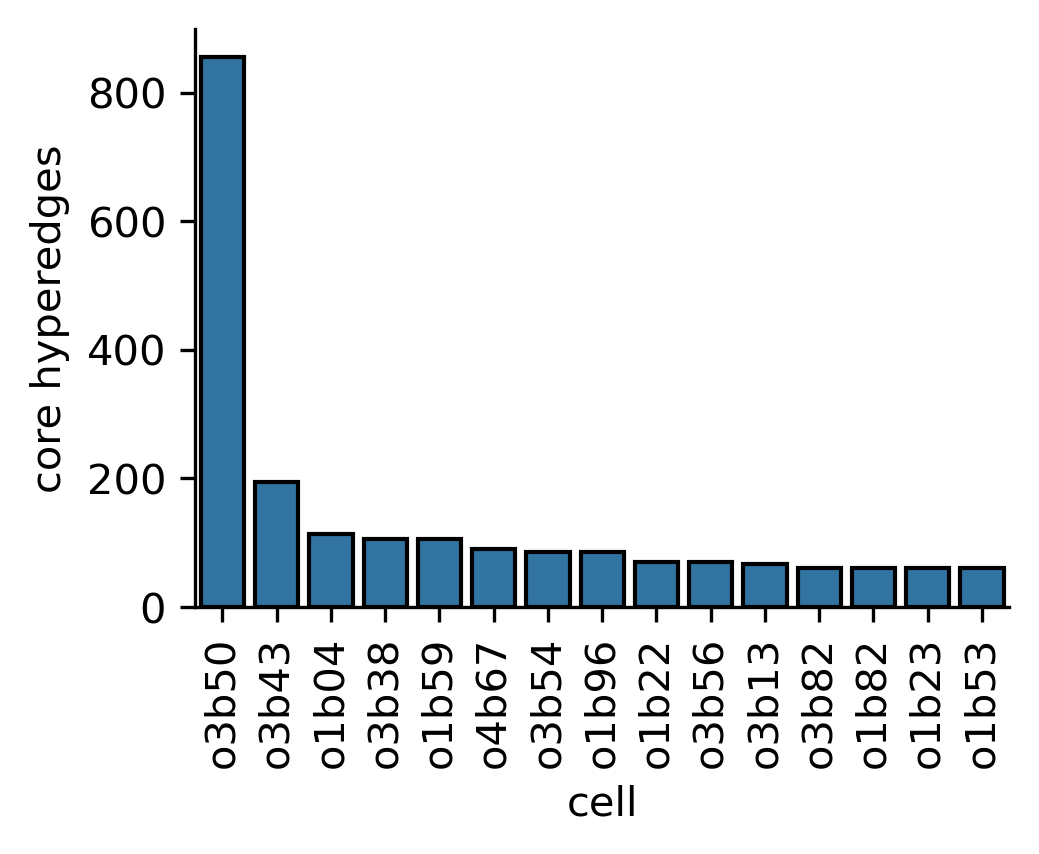

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3.5, 2.5

hyperedges_per_cell = cell_index['cell_id'].value_counts().reset_index()

sns.barplot(
    data=hyperedges_per_cell.head(15),
    x='cell_id',
    y='count',
    ec='k',
)
plt.ylabel('core hyperedges')
plt.xlabel('cell')
plt.gca().tick_params(axis='x', rotation=90)
sns.despine()

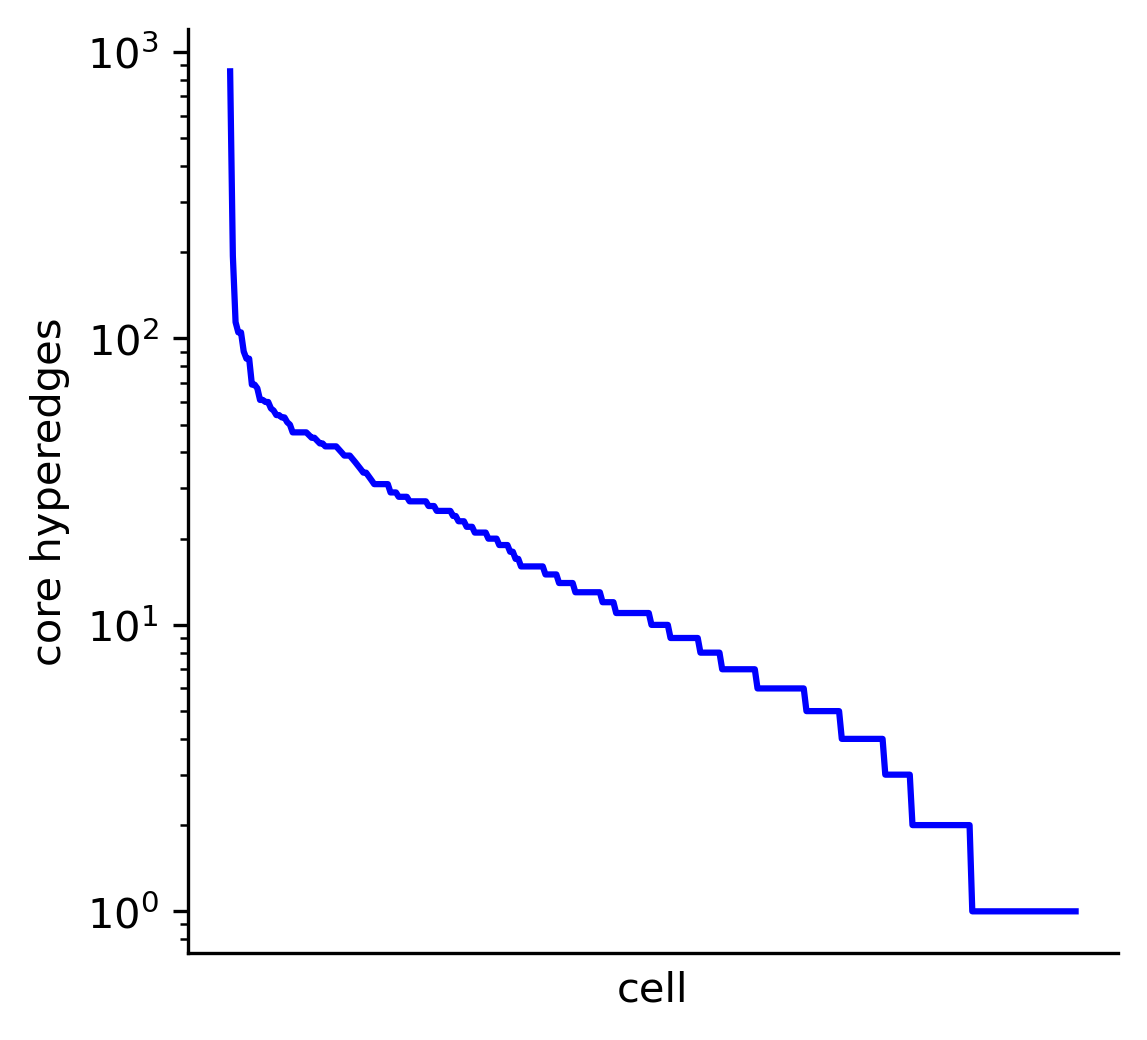

In [5]:
# Create the line plot
n_cells = len(hyperedges_per_cell)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4
sns.lineplot(
    data=hyperedges_per_cell,
    x='cell_id',
    y='count',
    c='b',
)

# # Add the horizontal line
# threshold = 2
# plt.axhline(y=threshold, c='r', lw=1, label=f"{threshold=}")
# plt.legend()

plt.ylabel('core hyperedges')
plt.xlabel('cell')
plt.gca().tick_params(axis='x', rotation=90)
sns.despine()

# # Calculate counts above and below the line
# above_line = hyperedges_per_cell['count'][hyperedges_per_cell['count'] > threshold].count()
# below_line = hyperedges_per_cell['count'][hyperedges_per_cell['count'] < threshold].count()

# # Add text annotations to the plot
# fontsize = 10
# plt.text(0.5, threshold + 0.5, f'pass: {above_line} ({100*(above_line / n_cells ):.2f}%)', fontsize=fontsize) 
# plt.text(0.5, threshold - 0.7, f'fail: {below_line} ({100*(below_line / n_cells ):.2f}%)', fontsize=fontsize) 

# Set the y-scale to logarithmic
plt.yscale('log')

# Remove x-ticks
plt.xticks([])

# Show the plot
plt.show()

# load the population parameters

In [6]:
dpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/hypergraph-mt/"
file_list = glob.glob(f"{dpath}/u*")
k_list = [int(os.path.basename(x).split("_")[1].split(".")[0]) for x in file_list ]
k_list = sorted(k_list)
k_list[:10]

[2, 20, 38, 56, 74, 92, 110, 129, 147, 165]

In [7]:
k = 2
print(f"{k=}")

fpath = f"/scratch/indikar_root/indikar1/shared_data/higher_order/hypergraph-mt/u_{k}.pkl"
u = pd.read_pickle(fpath)
print(f"{u.shape=}")

fpath = f"/scratch/indikar_root/indikar1/shared_data/higher_order/hypergraph-mt/w_{k}.pkl"
w = pd.read_pickle(fpath)
w = w.reset_index(drop=True) # reset in the index for quick access later
print(f"{w.shape=}")

k=2
u.shape=(17186, 2)
w.shape=(7, 2)


# prepare single-cell data

In [8]:
max_order = 8  # same as population
params = {}

for cell_id, group in cell_index.groupby('cell_id'):
    Bc = Hsc[group.index]
    A = np.ones(Bc.shape[1])
    hyperedges = Bc.apply(lambda x: tuple(x[x > 0].index), axis=0).to_numpy()

    # Hyperedge filtering
    orders = [len(e) for e in hyperedges]
    if max_order:
        edge_idx = [eid for eid, d in enumerate(orders) if 2 <= d <= max_order]
    else:
        edge_idx = [eid for eid, _ in enumerate(orders)]

    passing_orders = np.array(orders)[edge_idx]
    unique_orders =  sorted(np.unique(passing_orders))
    if not len(unique_orders) > 0:
        print(f"skipping {cell_id} with {len(hyperedges)} hyperedges mean order {np.mean(orders)}")
        continue
        
    params[cell_id] = {
        'A': A,
        'B': Bc,
        'hyperedges': hyperedges,
        'genes': np.where(Bc.values)[0],
        'edge_idx': edge_idx,
        'orders': passing_orders,
        'unique_orders': unique_orders,
        'max_order' : np.max(unique_orders),
    }

print('done')

skipping o1b35 with 7 hyperedges mean order 1.0
skipping o2b06 with 3 hyperedges mean order 1.0
skipping o2b08 with 4 hyperedges mean order 1.0
skipping o2b24 with 3 hyperedges mean order 1.0
skipping o2b27 with 6 hyperedges mean order 1.0
skipping o2b37 with 4 hyperedges mean order 1.0
skipping o2b42 with 4 hyperedges mean order 1.0
skipping o2b43 with 6 hyperedges mean order 1.0
skipping o2b50 with 5 hyperedges mean order 1.0
skipping o2b53 with 4 hyperedges mean order 1.0
skipping o2b54 with 9 hyperedges mean order 1.0
skipping o2b56 with 4 hyperedges mean order 1.0
skipping o2b58 with 4 hyperedges mean order 1.0
skipping o2b64 with 5 hyperedges mean order 1.0
skipping o2b77 with 5 hyperedges mean order 1.0
skipping o2b84 with 4 hyperedges mean order 1.0
skipping o2b85 with 4 hyperedges mean order 1.0
skipping o2b92 with 7 hyperedges mean order 1.0
skipping o2b94 with 3 hyperedges mean order 1.0
skipping o2b95 with 5 hyperedges mean order 1.0
skipping o3b12 with 2 hyperedges mean or

# Run the model

In [9]:
results = {}

min_count = 100
for idx, row in hyperedges_per_cell.iterrows():
    cell_id = row['cell_id']
    count = row['count']

    # exclude cells with too few hyperedges
    if not count >= int(k):
        break

    print(f"--------- Cell: {cell_id} with {count} hyperedges... ---------")
    
    param_dict = params[cell_id]
    start_time = time.time()
    model = hymt.model.HyMT(
        verbose=False,
        num_realizations=3,
        max_iter=100,
    )

    A = param_dict['A']
    B = param_dict['B']
    gene_idx = param_dict['genes']
    hyperedges = param_dict['hyperedges']
    edge_idx = param_dict['edge_idx']
    max_order = param_dict['max_order']
    unique_orders = param_dict['unique_orders']
    w_index = [x - 2 for x in unique_orders]

    # skip cells with a single hyperedge
    if not B.shape[1] >= k:
        print(f"skipping {cell_id} with {B.shape=}")
        continue
    
    """Modify w based on observed hyperedge order distribution """
    wc = w.iloc[w_index].copy()

    # cell specific config depends on wc
    conf_inf = {
        "seed": 10,
        "constraintU": False,
        "fix_communities": False,
        "fix_w": True,
        "gammaU": 0,
        "gammaW": 0,
        "initialize_u": u.to_numpy(), 
        "initialize_w": wc.to_numpy(),  
        "out_inference": False,
        "plot_loglik": False,
    }    

    try:
        uc, wc, maxL = model.fit(
            A[edge_idx], 
            hyperedges[edge_idx], 
            B.to_numpy()[:, edge_idx],
            K=k,
            **conf_inf,
        )
    except:
        print(f"WARNING: error with cell {cell_id}, skipping...")
        continue

    uc = pd.DataFrame.sparse.from_spmatrix(
        csr_matrix(uc), 
        index=B.index,
        columns=u.columns,
    )

    wc = pd.DataFrame.sparse.from_spmatrix(
        csr_matrix(wc),
        columns=u.columns,
    )

    print(f"{cell_id} maximum likilihood {maxL:.3f}")
    
    results[cell_id] = {
        'u' : uc,
        'w' : wc,
        'maxL' : maxL,
    }

print("done.")
print(len(results))

--------- Cell: o3b50 with 856 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.29013924]
(array([6]), array([1]))
i= 16936 []
o3b50 maximum likilihood -51933.523
--------- Cell: o3b43 with 194 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.93670529]
(array([6]), array([1]))
i= 16921 []
o3b43 maximum likilihood -5636.988
--------- Cell: o1b04 with 114 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-4.01814749]
(array([6]), array([1]))
i= 16906 []
o1b04 maximum likilihood 3324839.810
--------- Cell: o3b38 with 105 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.19241675]
(array([6]), array([1]))
i= 16911 []
o3b38 maximum likilihood 3365026.936
--------- Cell: o1b59 with 105 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.18393433]
(array([6]), array([1]))
i= 16904 []
o1b59 maximum likilihood -2306.952
--------- Cell: o4b67 with 90 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.21370781]
(array([6]), array([1]))
i= 16912 []
o4b67 maximum likilihood 1678084.312
--------- Cell: o3b54 with 85 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.41009469]
(array([6]), array([1]))
i= 16910 []
o3b54 maximum likilihood 2443733.820
--------- Cell: o1b96 with 85 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.40400785]
(array([6]), array([1]))
i= 16911 []
o1b96 maximum likilihood 3003032.354
--------- Cell: o1b22 with 69 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.06676288]
(array([6]), array([1]))
i= 16907 []
o1b22 maximum likilihood -1318.925
--------- Cell: o3b56 with 69 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.31570978]
(array([6]), array([1]))
i= 16907 []
o3b56 maximum likilihood 3859985.956
--------- Cell: o3b13 with 67 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.99285809]
(array([6]), array([1]))
i= 16916 []
o3b13 maximum likilihood 1372856.759
--------- Cell: o3b82 with 61 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.46046418]
(array([6]), array([1]))
i= 16909 []
o3b82 maximum likilihood 3724568.670
--------- Cell: o1b82 with 61 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.05967794e+15]
(array([7]), array([0]))
i= 16904 []
o1b82 maximum likilihood 2923408.986
--------- Cell: o1b23 with 60 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.40163436e+15]
(array([7]), array([0]))
i= 16891 []
o1b23 maximum likilihood 3688274.979
--------- Cell: o1b53 with 60 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.38395638e+14]
(array([7]), array([0]))
i= 16885 []
o1b53 maximum likilihood 3308072.430
--------- Cell: o1b03 with 57 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.56464626]
(array([6]), array([1]))
i= 16906 []
o1b03 maximum likilihood -998.245
--------- Cell: o1b71 with 56 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.89276713e+14]
(array([7]), array([0]))
i= 16888 []
o1b71 maximum likilihood 3517381.773
--------- Cell: o1b66 with 54 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.90527776]
(array([6]), array([1]))
i= 16914 []
o1b66 maximum likilihood -898.325
--------- Cell: o1b54 with 54 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.08163922e+15]
(array([7]), array([0]))
i= 16841 []
o1b54 maximum likilihood 4136335.424
--------- Cell: o1b47 with 53 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.83000796]
(array([6]), array([1]))
i= 16910 []
o1b47 maximum likilihood -837.781
--------- Cell: o1b58 with 53 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.69610076e+14]
(array([7]), array([0]))
i= 16911 []
o1b58 maximum likilihood 1790029.619
--------- Cell: o1b31 with 51 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.34799418e+14]
(array([7]), array([0]))
i= 16866 []
o1b31 maximum likilihood 3106773.274
--------- Cell: o1b05 with 50 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.31936817e+14]
(array([7]), array([0]))
i= 16907 []


2025-01-14 14:12:34,741 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:12:34 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o1b05 maximum likilihood 2373294.725
--------- Cell: o1b30 with 47 hyperedges... ---------
--------- Cell: o1b25 with 47 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.11691989]
(array([6]), array([1]))
i= 16912 []
o1b25 maximum likilihood -848.097
--------- Cell: o3b52 with 47 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-2.74462361e+14]
(array([7]), array([0]))
i= 16847 []
o3b52 maximum likilihood 4181418.704
--------- Cell: o1b43 with 47 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.87793524e+00 -4.55497127e+13]
(array([6, 7]), array([1, 0]))
i= 16906 []
o1b43 maximum likilihood 2230788.091
--------- Cell: o1b37 with 47 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.50369659]
(array([6]), array([1]))
i= 16909 []
o1b37 maximum likilihood -926.135
--------- Cell: o1b41 with 47 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-2.74256894e+14]
(array([7]), array([0]))
i= 16884 []
o1b41 maximum likilihood 2284291.381
--------- Cell: o1b27 with 46 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.26732541e+14]
(array([7]), array([0]))
i= 16867 []
o1b27 maximum likilihood 2687057.569
--------- Cell: o1b83 with 45 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.16755947e+15]
(array([7]), array([0]))
i= 16856 []
o1b83 maximum likilihood 3164582.994
--------- Cell: o3b93 with 45 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.00574607e+15]
(array([7]), array([0]))
i= 16864 []
o3b93 maximum likilihood 2969846.998
--------- Cell: o1b17 with 44 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-4.32188063e+14]
(array([7]), array([0]))
i= 16851 []
o1b17 maximum likilihood 1924068.303
--------- Cell: o3b96 with 43 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.31198088]
(array([6]), array([1]))
i= 16902 []
o3b96 maximum likilihood -863.956
--------- Cell: o3b11 with 43 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.40551023]
(array([6]), array([1]))
i= 16911 []
o3b11 maximum likilihood -709.758
--------- Cell: o1b10 with 42 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.05160757e+15]
(array([7]), array([0]))
i= 16834 []
o1b10 maximum likilihood 4120066.632
--------- Cell: o1b29 with 42 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00622287]
(array([4]), array([1]))
i= 17144 []
o1b29 maximum likilihood -654.352
--------- Cell: o1b61 with 42 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-10.33775977]
(array([6]), array([1]))
i= 16904 []
o1b61 maximum likilihood -736.976
--------- Cell: o1b45 with 42 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-2.91791679]
(array([6]), array([1]))
i= 16934 []
o1b45 maximum likilihood 625067.154
--------- Cell: o1b18 with 42 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.71682028e+13]
(array([7]), array([0]))
i= 16845 []
o1b18 maximum likilihood 3848369.603
--------- Cell: o1b78 with 41 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.24092164e+15]
(array([7]), array([0]))
i= 16809 []
o1b78 maximum likilihood 3587387.689
--------- Cell: o1b16 with 40 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.08171101e+14]
(array([7]), array([0]))
i= 16865 []
o1b16 maximum likilihood 2302450.747
--------- Cell: o1b20 with 39 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00387966]
(array([4]), array([1]))
i= 17143 []
o1b20 maximum likilihood -656.461
--------- Cell: o1b06 with 39 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.95154352]
(array([6]), array([1]))
i= 16911 []
o1b06 maximum likilihood -558.121
--------- Cell: o1b67 with 39 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.24867994e+15]
(array([7]), array([0]))
i= 16835 []
o1b67 maximum likilihood 3348090.016
--------- Cell: o1b09 with 38 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.34675351]
(array([6]), array([1]))
i= 16915 []
o1b09 maximum likilihood -638.294
--------- Cell: o3b55 with 37 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.76919914]
(array([6]), array([1]))
i= 16908 []
o3b55 maximum likilihood -763.930
--------- Cell: o1b46 with 36 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.81758989]
(array([6]), array([1]))
i= 16911 []


2025-01-14 14:24:33,934 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:24:33 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o1b46 maximum likilihood -520.910
--------- Cell: o1b62 with 35 hyperedges... ---------
--------- Cell: o1b91 with 34 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.17284077e+14]
(array([7]), array([0]))
i= 16859 []
o1b91 maximum likilihood 2086294.826
--------- Cell: o1b39 with 34 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.19570871e+15]
(array([7]), array([0]))
i= 16799 []
o1b39 maximum likilihood 4853135.534
--------- Cell: o1b32 with 33 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-4.79355902e+14]
(array([7]), array([0]))
i= 16823 []
o1b32 maximum likilihood 2680390.162
--------- Cell: o1b72 with 32 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-4.6606202]
(array([6]), array([1]))
i= 16911 []
o1b72 maximum likilihood -405.143
--------- Cell: o1b64 with 31 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.10170311e+15]
(array([7]), array([0]))
i= 16794 []
o1b64 maximum likilihood 3657898.406
--------- Cell: o1b33 with 31 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.37713358e+14]
(array([7]), array([0]))
i= 16784 []
o1b33 maximum likilihood 4063239.198
--------- Cell: o1b42 with 31 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00181479]
(array([4]), array([1]))
i= 17143 []
o1b42 maximum likilihood -465.898
--------- Cell: o1b51 with 31 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.1052921e+14]
(array([7]), array([0]))
i= 16835 []
o1b51 maximum likilihood 2023016.602
--------- Cell: o3b51 with 31 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.58116524]
(array([6]), array([1]))
i= 16903 []
o3b51 maximum likilihood -369.557
--------- Cell: o1b69 with 31 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.81664178]
(array([6]), array([1]))
i= 16898 []
o1b69 maximum likilihood -387.730
--------- Cell: o3b09 with 29 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-2.40679607]
(array([6]), array([1]))
i= 16913 []
o3b09 maximum likilihood -224.410
--------- Cell: o1b52 with 29 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.6401762e+14]
(array([7]), array([0]))
i= 16794 []
o1b52 maximum likilihood 3494005.058
--------- Cell: o3b92 with 29 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.90228725]
(array([6]), array([1]))
i= 16909 []
o3b92 maximum likilihood -332.676
--------- Cell: o3b79 with 28 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.9378123]
(array([6]), array([1]))
i= 16920 []
o3b79 maximum likilihood -264.584
--------- Cell: o3b18 with 28 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.41301928]
(array([6]), array([1]))
i= 16910 []
o3b18 maximum likilihood -262.102
--------- Cell: o2b91 with 28 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.57918762]
(array([6]), array([1]))
i= 16908 []


2025-01-14 14:31:06,120 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:31:06 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o2b91 maximum likilihood -242.600
--------- Cell: o1b81 with 28 hyperedges... ---------
--------- Cell: o1b48 with 27 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-9.34056937e+14]
(array([7]), array([0]))
i= 16796 []
o1b48 maximum likilihood 3229737.251
--------- Cell: o1b57 with 27 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.19424186e+15]
(array([7]), array([0]))
i= 16766 []
o1b57 maximum likilihood 4847325.570
--------- Cell: o1b75 with 27 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.98064119]
(array([6]), array([1]))
i= 16904 []
o1b75 maximum likilihood -379.194
--------- Cell: o3b88 with 27 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.41525202e+15]
(array([7]), array([0]))
i= 16762 []
o3b88 maximum likilihood 4095084.845
--------- Cell: o1b93 with 27 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.02990959e+14]
(array([7]), array([0]))
i= 16791 []


2025-01-14 14:33:21,054 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:33:21 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o1b93 maximum likilihood 3118505.139
--------- Cell: o1b08 with 27 hyperedges... ---------
--------- Cell: o1b94 with 27 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.3718716]
(array([6]), array([1]))
i= 16907 []
o1b94 maximum likilihood -414.832
--------- Cell: o4b74 with 26 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.31752099]
(array([6]), array([1]))
i= 16901 []
o4b74 maximum likilihood -353.376
--------- Cell: o1b49 with 26 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.92436419e+14]
(array([7]), array([0]))
i= 16770 []


2025-01-14 14:34:37,205 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (5, 2)!
Tue Jan 14 14:34:37 2025 ERROR w0 must have shape (6, 2). In input was given (5, 2)!
2025-01-14 14:34:37,251 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:34:37 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o1b49 maximum likilihood 4086716.492
--------- Cell: o1b70 with 26 hyperedges... ---------
--------- Cell: o1b89 with 25 hyperedges... ---------
--------- Cell: o3b33 with 25 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.07656727e+15]
(array([7]), array([0]))
i= 16779 []
o3b33 maximum likilihood 3320682.246
--------- Cell: o3b03 with 25 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.13355749]
(array([6]), array([1]))
i= 16906 []
o3b03 maximum likilihood -288.100
--------- Cell: o1b76 with 25 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.42391636e+14]
(array([7]), array([0]))
i= 16747 []


2025-01-14 14:35:59,057 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:35:59 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!


o1b76 maximum likilihood 5176722.226
--------- Cell: o1b38 with 25 hyperedges... ---------
--------- Cell: o1b95 with 25 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.08213582]
(array([6]), array([1]))
i= 16908 []
o1b95 maximum likilihood -201.141
--------- Cell: o3b24 with 24 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.55213544]
(array([6]), array([1]))
i= 16912 []
o3b24 maximum likilihood -260.800
--------- Cell: o3b74 with 24 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.098702e+15]
(array([7]), array([0]))
i= 16778 []


2025-01-14 14:37:18,532 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:37:18 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!


o3b74 maximum likilihood 3333141.244
--------- Cell: o3b44 with 23 hyperedges... ---------
--------- Cell: o1b56 with 23 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.99813616]
(array([6]), array([1]))
i= 16914 []
o1b56 maximum likilihood -162.136
--------- Cell: o1b24 with 23 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.48603703]
(array([6]), array([1]))
i= 16912 []


2025-01-14 14:38:14,927 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:38:14 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o1b24 maximum likilihood -240.017
--------- Cell: o3b78 with 22 hyperedges... ---------
--------- Cell: o3b60 with 22 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.84475298e+08]
(array([5]), array([0]))
i= 17102 []
o3b60 maximum likilihood -433.666
--------- Cell: o3b59 with 22 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.48628947]
(array([6]), array([1]))
i= 16915 []
o3b59 maximum likilihood -289.304
--------- Cell: o1b07 with 21 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00805806]
(array([4]), array([1]))
i= 17142 []
o1b07 maximum likilihood -255.874
--------- Cell: o3b19 with 21 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.54968306]
(array([6]), array([1]))
i= 16908 []
o3b19 maximum likilihood -164.347
--------- Cell: o3b07 with 21 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-9.72189169]
(array([6]), array([1]))
i= 16906 []
o3b07 maximum likilihood -183.032
--------- Cell: o3b58 with 21 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.08363708e+08]
(array([5]), array([0]))
i= 17090 []


2025-01-14 14:40:56,622 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:40:56 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o3b58 maximum likilihood -446.214
--------- Cell: o3b49 with 21 hyperedges... ---------
--------- Cell: o3b75 with 20 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-6.78022979]
(array([6]), array([1]))
i= 16906 []


2025-01-14 14:41:28,397 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:41:28 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!
2025-01-14 14:41:28,442 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (5, 2)!
Tue Jan 14 14:41:28 2025 ERROR w0 must have shape (6, 2). In input was given (5, 2)!


o3b75 maximum likilihood -168.828
--------- Cell: o3b95 with 20 hyperedges... ---------
--------- Cell: o3b77 with 20 hyperedges... ---------
--------- Cell: o1b34 with 20 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-8.08177364]
(array([6]), array([1]))
i= 16908 []
o1b34 maximum likilihood -207.803
--------- Cell: o1b84 with 19 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-2.56437811e+14]
(array([7]), array([0]))
i= 16775 []
o1b84 maximum likilihood 2494310.128
--------- Cell: o3b66 with 19 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.31210978e+15]
(array([7]), array([0]))
i= 16756 []
o3b66 maximum likilihood 3965452.713
--------- Cell: o1b63 with 19 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-9.82805957e+14]
(array([7]), array([0]))
i= 16737 []
o1b63 maximum likilihood 5631416.543
--------- Cell: o3b06 with 19 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.24364789e+08]
(array([5]), array([0]))
i= 17089 []
o3b06 maximum likilihood -406.949
--------- Cell: o1b92 with 18 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.28339936]
(array([6]), array([1]))
i= 16912 []
o1b92 maximum likilihood -79.899
--------- Cell: o1b40 with 18 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.60905866e+14]
(array([7]), array([0]))
i= 16737 []


2025-01-14 14:44:39,878 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (5, 2)!
Tue Jan 14 14:44:39 2025 ERROR w0 must have shape (6, 2). In input was given (5, 2)!
2025-01-14 14:44:39,922 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:44:39 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!


o1b40 maximum likilihood 3942903.212
--------- Cell: o3b23 with 17 hyperedges... ---------
--------- Cell: o2b05 with 17 hyperedges... ---------
--------- Cell: o3b80 with 16 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-4.28837065e+08]
(array([5]), array([0]))
i= 17093 []
o3b80 maximum likilihood -375.422
--------- Cell: o1b88 with 16 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-9.0004848]
(array([6]), array([1]))
i= 16906 []
o1b88 maximum likilihood 24.795
--------- Cell: o3b45 with 16 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.16072262e+15]
(array([7]), array([0]))
i= 16714 []


2025-01-14 14:46:06,474 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:46:06 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!
2025-01-14 14:46:06,517 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:46:06 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!
2025-01-14 14:46:06,561 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (5, 2)!
Tue Jan 14 14:46:06 2025 ERROR w0 must have shape (6, 2). In input was given (5, 2)!


o3b45 maximum likilihood 6006338.084
--------- Cell: o3b14 with 16 hyperedges... ---------
--------- Cell: o1b44 with 16 hyperedges... ---------
--------- Cell: o3b30 with 16 hyperedges... ---------
--------- Cell: o3b40 with 16 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.67489609]
(array([6]), array([1]))
i= 16908 []
o3b40 maximum likilihood -19.547
--------- Cell: o3b04 with 16 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-4.12418853e+14]
(array([7]), array([0]))
i= 16761 []
o3b04 maximum likilihood 3301950.625
--------- Cell: o3b76 with 16 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.5417163e+14]
(array([7]), array([0]))
i= 16779 []
o3b76 maximum likilihood 2235909.656
--------- Cell: o3b34 with 15 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-2.47347001e+14]
(array([7]), array([0]))
i= 16775 []


2025-01-14 14:48:14,874 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:48:14 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o3b34 maximum likilihood 1863967.416
--------- Cell: o3b08 with 15 hyperedges... ---------
--------- Cell: o3b71 with 15 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00794579]
(array([4]), array([1]))
i= 17142 []
o3b71 maximum likilihood -332.783
--------- Cell: o3b70 with 15 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-4.72686846]
(array([6]), array([1]))
i= 16923 []


2025-01-14 14:49:13,790 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:49:13 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!
2025-01-14 14:49:13,853 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:49:13 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o3b70 maximum likilihood -30.999
--------- Cell: o3b67 with 15 hyperedges... ---------
--------- Cell: o4b87 with 14 hyperedges... ---------
--------- Cell: o4b40 with 14 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.70044305e+08]
(array([5]), array([0]))
i= 17072 []
o4b40 maximum likilihood -307.884
--------- Cell: o3b21 with 14 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-26162163.65582645]
(array([5]), array([0]))
i= 17081 []


2025-01-14 14:50:17,412 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:50:17 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o3b21 maximum likilihood -305.319
--------- Cell: o3b46 with 14 hyperedges... ---------
--------- Cell: o3b36 with 14 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.68591445]
(array([6]), array([1]))
i= 16910 []


2025-01-14 14:50:45,055 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:50:45 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o3b36 maximum likilihood 68.647
--------- Cell: o3b27 with 14 hyperedges... ---------
--------- Cell: o3b69 with 13 hyperedges... ---------


2025-01-14 14:50:45,152 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:50:45 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!
2025-01-14 14:50:45,245 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:50:45 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!
2025-01-14 14:50:45,332 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:50:45 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!


--------- Cell: o3b64 with 13 hyperedges... ---------
--------- Cell: o1b86 with 13 hyperedges... ---------
--------- Cell: o1b87 with 13 hyperedges... ---------


2025-01-14 14:50:45,422 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:50:45 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!
/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


--------- Cell: o3b63 with 13 hyperedges... ---------
psiOmega [-0.00126519]
(array([4]), array([1]))
i= 17141 []
o3b63 maximum likilihood -265.237
--------- Cell: o1b21 with 13 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.92685839e+08]
(array([5]), array([0]))
i= 17064 []


2025-01-14 14:51:58,383 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:51:58 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!


o1b21 maximum likilihood -280.967
--------- Cell: o3b68 with 13 hyperedges... ---------
--------- Cell: o3b84 with 13 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00488098]
(array([4]), array([1]))
i= 17141 []


2025-01-14 14:52:36,621 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (5, 2)!
Tue Jan 14 14:52:36 2025 ERROR w0 must have shape (6, 2). In input was given (5, 2)!


o3b84 maximum likilihood -304.469
--------- Cell: o2b45 with 13 hyperedges... ---------
--------- Cell: o3b87 with 13 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-9.71624556]
(array([6]), array([1]))
i= 16902 []


2025-01-14 14:53:17,754 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:53:17 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!


o3b87 maximum likilihood 10.302
--------- Cell: o3b35 with 12 hyperedges... ---------
--------- Cell: o1b55 with 12 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-3.33055139e+14]
(array([7]), array([0]))
i= 16782 []


2025-01-14 14:53:47,368 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:53:47 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:53:47,461 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!


o1b55 maximum likilihood 1736784.251
--------- Cell: o3b42 with 12 hyperedges... ---------
--------- Cell: o2b57 with 12 hyperedges... ---------


Tue Jan 14 14:53:47 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!
/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


--------- Cell: o1b12 with 12 hyperedges... ---------
psiOmega [-0.00773848]
(array([4]), array([1]))
i= 17142 []


2025-01-14 14:54:15,558 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 14:54:15 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!
2025-01-14 14:54:15,601 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:54:15 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!
2025-01-14 14:54:15,644 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:54:15 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!
2025-01-14 14:54:15,685 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 14:54:15 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!


o1b12 maximum likilihood -256.354
--------- Cell: o2b87 with 11 hyperedges... ---------
--------- Cell: o2b65 with 11 hyperedges... ---------
--------- Cell: o3b57 with 11 hyperedges... ---------
--------- Cell: o3b16 with 11 hyperedges... ---------
--------- Cell: o4b76 with 11 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-5.4138154e+14]
(array([7]), array([0]))
i= 16755 []


2025-01-14 14:54:44,461 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 14:54:44 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!
2025-01-14 14:54:44,504 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:54:44 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:54:44,546 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:54:44 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o4b76 maximum likilihood 2498207.499
--------- Cell: o1b26 with 11 hyperedges... ---------
--------- Cell: o1b28 with 11 hyperedges... ---------
--------- Cell: o1b79 with 11 hyperedges... ---------
--------- Cell: o3b20 with 11 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-1.30175358e+08]
(array([5]), array([0]))
i= 17063 []
o3b20 maximum likilihood -240.661
--------- Cell: o1b14 with 11 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))
2025-01-14 14:55:32,121 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:55:32 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!


o1b14 maximum likilihood -124.086
--------- Cell: o1b77 with 11 hyperedges... ---------
--------- Cell: o4b07 with 11 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00412639]
(array([4]), array([1]))
i= 17141 []
o4b07 maximum likilihood -225.648
--------- Cell: o3b94 with 11 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.12557397]
(array([6]), array([1]))
i= 16903 []
o3b94 maximum likilihood 106.104
--------- Cell: o3b62 with 10 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-2.6753439e+08]
(array([5]), array([0]))
i= 17068 []
o3b62 maximum likilihood -232.687
--------- Cell: o3b47 with 10 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00117095]
(array([4]), array([1]))
i= 17141 []
o3b47 maximum likilihood -253.276
--------- Cell: o3b10 with 10 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-7.15630687]
(array([6]), array([1]))
i= 16912 []


2025-01-14 14:57:56,893 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:57:56 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!


o3b10 maximum likilihood 50.895
--------- Cell: o1b02 with 10 hyperedges... ---------
--------- Cell: o2b78 with 10 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.0059196]
(array([4]), array([1]))
i= 17141 []


2025-01-14 14:58:20,056 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 14:58:20 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!
2025-01-14 14:58:20,099 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:58:20 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:58:20,141 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:58:20 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:58:20,183 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 14:58:20 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!


o2b78 maximum likilihood -225.511
--------- Cell: o2b70 with 10 hyperedges... ---------
--------- Cell: o2b21 with 10 hyperedges... ---------
--------- Cell: o1b68 with 9 hyperedges... ---------
--------- Cell: o2b76 with 9 hyperedges... ---------
--------- Cell: o4b22 with 9 hyperedges... ---------


2025-01-14 14:58:20,226 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:58:20 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:58:20,269 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (5, 2)!
Tue Jan 14 14:58:20 2025 ERROR w0 must have shape (6, 2). In input was given (5, 2)!
2025-01-14 14:58:20,311 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 14:58:20 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 14:58:20,353 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:58:20 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!
2025-01-14 14:58:20,394 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!


--------- Cell: o3b02 with 9 hyperedges... ---------
--------- Cell: o3b65 with 9 hyperedges... ---------
--------- Cell: o4b18 with 9 hyperedges... ---------
--------- Cell: o1b85 with 9 hyperedges... ---------
--------- Cell: o3b26 with 9 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-4.69707335e+08]
(array([5]), array([0]))
i= 17059 []


2025-01-14 14:58:44,014 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (3, 2)!
Tue Jan 14 14:58:44 2025 ERROR w0 must have shape (6, 2). In input was given (3, 2)!


o3b26 maximum likilihood -216.551
--------- Cell: o3b53 with 9 hyperedges... ---------
--------- Cell: o2b16 with 9 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.0056949]
(array([4]), array([1]))
i= 17141 []


2025-01-14 14:59:11,440 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:59:11 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:59:11,531 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 14:59:11 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!


o2b16 maximum likilihood -180.428
--------- Cell: o2b59 with 9 hyperedges... ---------
--------- Cell: o4b41 with 8 hyperedges... ---------
--------- Cell: o2b46 with 8 hyperedges... ---------


2025-01-14 14:59:11,615 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 14:59:11 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 14:59:11,700 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (4, 2)!
Tue Jan 14 14:59:11 2025 ERROR w0 must have shape (7, 2). In input was given (4, 2)!
2025-01-14 14:59:11,790 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (5, 2)!
Tue Jan 14 14:59:11 2025 ERROR w0 must have shape (7, 2). In input was given (5, 2)!


--------- Cell: o1b11 with 8 hyperedges... ---------
--------- Cell: o3b25 with 8 hyperedges... ---------
--------- Cell: o4b46 with 8 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))
2025-01-14 14:59:46,793 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:59:46 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:59:46,835 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 14:59:46 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 14:59:46,876 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (4, 2)!
Tue Jan 14 14:59:46 2025 ERROR w0 must have shape (7, 2). In input was given (4, 2)!
2025-01-14 14:59:46,919 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (5, 2)!


o4b46 maximum likilihood -54.727
--------- Cell: o3b37 with 8 hyperedges... ---------
--------- Cell: o3b61 with 8 hyperedges... ---------
--------- Cell: o4b30 with 8 hyperedges... ---------
--------- Cell: o1b74 with 7 hyperedges... ---------
--------- Cell: o4b52 with 7 hyperedges... ---------


2025-01-14 14:59:46,962 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (6, 2)!
Tue Jan 14 14:59:46 2025 ERROR w0 must have shape (7, 2). In input was given (6, 2)!
2025-01-14 14:59:47,004 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (3, 2)!
Tue Jan 14 14:59:47 2025 ERROR w0 must have shape (7, 2). In input was given (3, 2)!
2025-01-14 14:59:47,045 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:59:47 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:59:47,087 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:59:47 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:59:47,128 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!


--------- Cell: o2b69 with 7 hyperedges... ---------
--------- Cell: o3b15 with 7 hyperedges... ---------
--------- Cell: o3b72 with 7 hyperedges... ---------
--------- Cell: o1b73 with 7 hyperedges... ---------
--------- Cell: o1b13 with 7 hyperedges... ---------


2025-01-14 14:59:47,171 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:59:47 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:59:47,212 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 14:59:47 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!
2025-01-14 14:59:47,254 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:59:47 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:59:47,296 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 14:59:47 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 14:59:47,339 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!


--------- Cell: o4b04 with 7 hyperedges... ---------
--------- Cell: o2b17 with 7 hyperedges... ---------
--------- Cell: o4b96 with 7 hyperedges... ---------
--------- Cell: o3b31 with 7 hyperedges... ---------
--------- Cell: o3b28 with 7 hyperedges... ---------


2025-01-14 14:59:47,382 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (4, 2)!
Tue Jan 14 14:59:47 2025 ERROR w0 must have shape (7, 2). In input was given (4, 2)!
/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


--------- Cell: o2b74 with 7 hyperedges... ---------
psiOmega [-0.00503937]
(array([4]), array([1]))
i= 17141 []


2025-01-14 15:00:10,752 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 15:00:10 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!


o2b74 maximum likilihood -119.613
--------- Cell: o2b29 with 6 hyperedges... ---------
--------- Cell: o4b84 with 6 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-0.00813648]
(array([4]), array([1]))
i= 17141 []


2025-01-14 15:00:33,999 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:00:33 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!
2025-01-14 15:00:34,041 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 15:00:34 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 15:00:34,082 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 15:00:34 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!
2025-01-14 15:00:34,125 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:00:34 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!


o4b84 maximum likilihood -136.880
--------- Cell: o2b31 with 6 hyperedges... ---------
--------- Cell: o3b91 with 6 hyperedges... ---------
--------- Cell: o4b81 with 6 hyperedges... ---------
--------- Cell: o3b86 with 6 hyperedges... ---------
--------- Cell: o1b19 with 6 hyperedges... ---------


2025-01-14 15:00:34,168 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (4, 2)!
Tue Jan 14 15:00:34 2025 ERROR w0 must have shape (7, 2). In input was given (4, 2)!
2025-01-14 15:00:34,209 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 15:00:34 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 15:00:34,251 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:00:34 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!
2025-01-14 15:00:34,293 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 15:00:34 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!
/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divi

--------- Cell: o3b39 with 6 hyperedges... ---------
--------- Cell: o2b71 with 6 hyperedges... ---------
--------- Cell: o3b01 with 6 hyperedges... ---------
--------- Cell: o2b18 with 6 hyperedges... ---------
psiOmega [-0.00148283]
(array([4]), array([1]))
i= 17140 []


2025-01-14 15:01:03,698 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (5, 2)!
Tue Jan 14 15:01:03 2025 ERROR w0 must have shape (6, 2). In input was given (5, 2)!
2025-01-14 15:01:03,740 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:01:03 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!
2025-01-14 15:01:03,782 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 15:01:03 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 15:01:03,824 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (4, 2)!
Tue Jan 14 15:01:03 2025 ERROR w0 must have shape (5, 2). In input was given (4, 2)!


o2b18 maximum likilihood -138.211
--------- Cell: o4b50 with 6 hyperedges... ---------
--------- Cell: o4b38 with 6 hyperedges... ---------
--------- Cell: o4b73 with 6 hyperedges... ---------
--------- Cell: o3b90 with 6 hyperedges... ---------
--------- Cell: o2b81 with 6 hyperedges... ---------


2025-01-14 15:01:03,866 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 15:01:03 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!
/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


--------- Cell: o2b96 with 6 hyperedges... ---------
i= 353 [5]


2025-01-14 15:01:33,443 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 15:01:33 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!
2025-01-14 15:01:33,549 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 15:01:33 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!


o2b96 maximum likilihood -55.065
--------- Cell: o2b09 with 6 hyperedges... ---------
--------- Cell: o3b73 with 5 hyperedges... ---------
--------- Cell: o1b80 with 5 hyperedges... ---------


2025-01-14 15:01:33,657 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (3, 2)!
Tue Jan 14 15:01:33 2025 ERROR w0 must have shape (6, 2). In input was given (3, 2)!
2025-01-14 15:01:33,766 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (2, 2)!
Tue Jan 14 15:01:33 2025 ERROR w0 must have shape (4, 2). In input was given (2, 2)!


--------- Cell: o3b48 with 5 hyperedges... ---------
--------- Cell: o3b85 with 5 hyperedges... ---------


2025-01-14 15:01:33,889 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:01:33 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!
2025-01-14 15:01:33,977 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:01:33 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:01:34,067 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 15:01:34 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!


--------- Cell: o2b61 with 5 hyperedges... ---------
--------- Cell: o2b44 with 5 hyperedges... ---------
--------- Cell: o3b81 with 5 hyperedges... ---------


2025-01-14 15:01:34,162 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (4, 2)!
Tue Jan 14 15:01:34 2025 ERROR w0 must have shape (6, 2). In input was given (4, 2)!
2025-01-14 15:01:34,258 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 15:01:34 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 15:01:34,347 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (2, 2). In input was given (1, 2)!
Tue Jan 14 15:01:34 2025 ERROR w0 must have shape (2, 2). In input was given (1, 2)!


--------- Cell: o4b56 with 5 hyperedges... ---------
--------- Cell: o2b30 with 5 hyperedges... ---------
--------- Cell: o1b60 with 5 hyperedges... ---------


2025-01-14 15:01:34,417 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:01:34 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!
2025-01-14 15:01:34,504 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:01:34 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!
2025-01-14 15:01:34,626 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (2, 2)!


--------- Cell: o3b89 with 5 hyperedges... ---------
--------- Cell: o4b62 with 5 hyperedges... ---------


Tue Jan 14 15:01:34 2025 ERROR w0 must have shape (6, 2). In input was given (2, 2)!
2025-01-14 15:01:34,714 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (2, 2)!
Tue Jan 14 15:01:34 2025 ERROR w0 must have shape (4, 2). In input was given (2, 2)!
/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


--------- Cell: o2b10 with 5 hyperedges... ---------
--------- Cell: o2b23 with 4 hyperedges... ---------
psiOmega [-0.00623458]
(array([4]), array([1]))
i= 17141 []
o2b23 maximum likilihood -95.837
--------- Cell: o1b15 with 4 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


psiOmega [-473.6314205]
(array([3]), array([0]))
i= 17181 []


2025-01-14 15:02:32,257 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:02:32,349 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!


o1b15 maximum likilihood -31.411
--------- Cell: o4b51 with 4 hyperedges... ---------
--------- Cell: o4b27 with 4 hyperedges... ---------
--------- Cell: o2b86 with 4 hyperedges... ---------


2025-01-14 15:02:32,441 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (3, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (6, 2). In input was given (3, 2)!
2025-01-14 15:02:32,536 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (2, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (6, 2). In input was given (2, 2)!
2025-01-14 15:02:32,622 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (3, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (7, 2). In input was given (3, 2)!


--------- Cell: o2b33 with 4 hyperedges... ---------
--------- Cell: o2b39 with 4 hyperedges... ---------
--------- Cell: o3b22 with 4 hyperedges... ---------


2025-01-14 15:02:32,706 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 15:02:32,791 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (2, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (5, 2). In input was given (2, 2)!
2025-01-14 15:02:32,859 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!


--------- Cell: o4b89 with 4 hyperedges... ---------
--------- Cell: o3b29 with 4 hyperedges... ---------
--------- Cell: o4b53 with 4 hyperedges... ---------


2025-01-14 15:02:32,946 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:02:32 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:02:33,031 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (2, 2)!
Tue Jan 14 15:02:33 2025 ERROR w0 must have shape (4, 2). In input was given (2, 2)!
2025-01-14 15:02:33,111 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (3, 2)!
Tue Jan 14 15:02:33 2025 ERROR w0 must have shape (6, 2). In input was given (3, 2)!


--------- Cell: o1b36 with 4 hyperedges... ---------
--------- Cell: o3b17 with 4 hyperedges... ---------
--------- Cell: o4b20 with 4 hyperedges... ---------


2025-01-14 15:02:33,200 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 15:02:33 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 15:02:33,281 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:02:33 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:02:33,365 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (3, 2)!
Tue Jan 14 15:02:33 2025 ERROR w0 must have shape (5, 2). In input was given (3, 2)!


--------- Cell: o3b41 with 4 hyperedges... ---------
--------- Cell: o1b90 with 4 hyperedges... ---------
--------- Cell: o2b75 with 3 hyperedges... ---------


2025-01-14 15:02:33,451 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (3, 2)!
Tue Jan 14 15:02:33 2025 ERROR w0 must have shape (7, 2). In input was given (3, 2)!
2025-01-14 15:02:33,546 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:02:33 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


--------- Cell: o3b83 with 3 hyperedges... ---------
--------- Cell: o1b50 with 3 hyperedges... ---------
psiOmega [-517.80752349]
(array([3]), array([0]))
i= 17177 []


2025-01-14 15:02:58,820 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (2, 2)!
Tue Jan 14 15:02:58 2025 ERROR w0 must have shape (7, 2). In input was given (2, 2)!
2025-01-14 15:02:58,862 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (2, 2)!
Tue Jan 14 15:02:58 2025 ERROR w0 must have shape (4, 2). In input was given (2, 2)!
2025-01-14 15:02:58,903 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (3, 2)!
Tue Jan 14 15:02:58 2025 ERROR w0 must have shape (4, 2). In input was given (3, 2)!
2025-01-14 15:02:58,944 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:02:58 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!


o1b50 maximum likilihood -23.709
--------- Cell: o2b34 with 3 hyperedges... ---------
--------- Cell: o3b05 with 3 hyperedges... ---------
--------- Cell: o3b32 with 3 hyperedges... ---------
--------- Cell: o2b63 with 3 hyperedges... ---------
--------- Cell: o2b22 with 3 hyperedges... ---------


2025-01-14 15:02:58,985 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:02:58 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:02:59,026 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (7, 2). In input was given (3, 2)!
Tue Jan 14 15:02:59 2025 ERROR w0 must have shape (7, 2). In input was given (3, 2)!
2025-01-14 15:02:59,066 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:02:59 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:02:59,107 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (2, 2)!
Tue Jan 14 15:02:59 2025 ERROR w0 must have shape (4, 2). In input was given (2, 2)!
2025-01-14 15:02:59,147 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (2, 2)!


--------- Cell: o4b42 with 3 hyperedges... ---------
--------- Cell: o4b26 with 3 hyperedges... ---------
--------- Cell: o4b39 with 2 hyperedges... ---------
--------- Cell: o2b28 with 2 hyperedges... ---------
--------- Cell: o1b01 with 2 hyperedges... ---------


Tue Jan 14 15:02:59 2025 ERROR w0 must have shape (5, 2). In input was given (2, 2)!
/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/init_sc.py:99: RuntimeWarning: divide by zero encountered in divide
  invDV2 = np.diag(np.sqrt(1.0 / self.node_degree))


--------- Cell: o2b19 with 2 hyperedges... ---------
--------- Cell: o4b77 with 2 hyperedges... ---------
--------- Cell: o4b48 with 2 hyperedges... ---------


/home/cstansbu/git_repositories/higher-order-single-cell/notebooks/../../Hypergraph-MT/code/HyMT/model.py:696: RuntimeWarning: invalid value encountered in divide
  self.u[i, ks] = u_tmp / u_tmp_den
2025-01-14 15:03:08,261 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (4, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (4, 2). In input was given (2, 2)!
2025-01-14 15:03:08,302 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (5, 2). In input was given (2, 2)!
2025-01-14 15:03:08,344 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:03:08,386 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (2, 2)!
Tue Jan 14 15:03:0

--------- Cell: o2b07 with 2 hyperedges... ---------
--------- Cell: o4b57 with 2 hyperedges... ---------
--------- Cell: o4b61 with 2 hyperedges... ---------
--------- Cell: o4b78 with 2 hyperedges... ---------
--------- Cell: o1b65 with 2 hyperedges... ---------
--------- Cell: o2b62 with 2 hyperedges... ---------
--------- Cell: o4b88 with 2 hyperedges... ---------


2025-01-14 15:03:08,427 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (6, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (6, 2). In input was given (2, 2)!
2025-01-14 15:03:08,466 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:03:08,507 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (5, 2). In input was given (2, 2)!
2025-01-14 15:03:08,548 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (5, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (5, 2). In input was given (2, 2)!
2025-01-14 15:03:08,590 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!


--------- Cell: o2b89 with 2 hyperedges... ---------
--------- Cell: o4b54 with 2 hyperedges... ---------
--------- Cell: o2b02 with 2 hyperedges... ---------
--------- Cell: o4b24 with 2 hyperedges... ---------
--------- Cell: o4b80 with 2 hyperedges... ---------
--------- Cell: o2b13 with 2 hyperedges... ---------
--------- Cell: o2b12 with 2 hyperedges... ---------
--------- Cell: o4b34 with 2 hyperedges... ---------


2025-01-14 15:03:08,633 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!
2025-01-14 15:03:08,673 - [PID 1685158] - hymt.model.HyMT           - ERROR - w0 must have shape (3, 2). In input was given (2, 2)!
Tue Jan 14 15:03:08 2025 ERROR w0 must have shape (3, 2). In input was given (2, 2)!


--------- Cell: o2b67 with 2 hyperedges... ---------
done.
130


# Save the outputs

In [21]:
outdir = "/scratch/indikar_root/indikar1/shared_data/higher_order/single_cell_hypergraph_mt/"

u_matrix = []

for cell_id, res_dict in results.items():

    res_dict['u'].to_pickle(
        f"{outdir}u_{cell_id}.pkl"
    )

    res_dict['w'].to_pickle(
        f"{outdir}w_{cell_id}.pkl"
    )

    u_sum = pd.DataFrame(res_dict['u'].sum(axis=1), columns=[cell_id])
    u_matrix.append(u_sum)

u_matrix = pd.concat(u_matrix, axis=1, ignore_index=False)
print(f"{u_matrix.shape=}")
u_matrix.head()

u_matrix.shape=(17186, 130)


,o3b50,o3b43,o1b04,o3b38,o1b59,o4b67,o3b54,o1b96,o1b22,o3b56,...,o3b26,o2b16,o4b46,o2b74,o4b84,o2b18,o2b96,o2b23,o1b15,o1b50
Smarca2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sh2d5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dyrk1a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Igf2bp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tmem267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
outpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/single_cell_hypergraph_mt/combined_u.pkl"
u_matrix.to_pickle(outpath)
u_matrix.head()

,o3b50,o3b43,o1b04,o3b38,o1b59,o4b67,o3b54,o1b96,o1b22,o3b56,...,o3b26,o2b16,o4b46,o2b74,o4b84,o2b18,o2b96,o2b23,o1b15,o1b50
Smarca2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sh2d5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dyrk1a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Igf2bp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tmem267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
u_matrix.sum()

o3b50     689.076142
o3b43     442.223640
o1b04     351.999976
o3b38     298.999976
o1b59     409.469891
            ...     
o2b18      15.999994
o2b96    1566.807318
o2b23      13.999994
o1b15    1300.000000
o1b50     900.000000
Length: 130, dtype: float64

,o3b50
Smarca2,0.0
Sh2d5,0.0
Dyrk1a,0.0
Igf2bp3,0.0
Tmem267,0.0
...,...
Chmp1a,0.0
Or6c7,0.0
Svs5,0.0
Glrx,0.0


In [10]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
break